<a href="https://colab.research.google.com/github/aarondelgiudice/thinkful_data_bootcamp/blob/master/unit_7/capstone/RD/7_1c_Lyric_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lyric Preprocessing
### Table of Contents
- Clean Text
- Parse Text
- Feature Extraction
  - bag of words

## Import Data

In [0]:
# load packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [0]:
# change field size to avoid ParseError
import sys
import csv

csv.field_size_limit(sys.maxsize)

filename = "lyric_test_data_clean"
# set engine="python" to avoid ParseError
# set error_bad_lines=False
#df_lyrics = pd.read_csv(filename + ".csv", index_col=0,
#                        engine="python", error_bad_lines=False)
df_lyrics = pd.read_csv(filename + ".csv", index_col=0)
# make sure lyric data is type string
df_lyrics['lyrics_raw'] = df_lyrics['lyrics_raw'].astype(str)
df_lyrics['lyrics_clean'] = df_lyrics['lyrics_clean'].astype(str)
df_lyrics.head()

,id,lyrics_raw,length_raw,lyrics_clean,length_clean
0,7eElVgPcxDqmgGrSwVFI74,"[Intro]\nNight, midnight, lose my mind\nNight,...",2485.0,night midnight lose my mind night midnight lo...,2275.0
1,02oAUzv4M0ItuTDy2RT3IT,[Verse 1]\nA couple rebel top gun pilots\nFlyi...,1795.0,couple rebel top gun pilots flying with nowhe...,1621.0
2,5q4BpnMrYEFzLO0dYODj6J,"[Verse 1]\nWell, summer slipped us underneath ...",1824.0,well summer slipped us underneath her tongue ...,1665.0
3,6Kkt27YmFyIFrcX3QXFi2o,"[Intro]\nOne, two\n\n[Verse 1]\nBaby really hu...",1305.0,one two baby really hurt me crying in the tax...,1157.0
4,1Dp7JGFNjvg8Nk0CtMCcnr,Hard Feelings\n\n(Go back and tell it)\n\nPlea...,2386.0,hard feelings go back and tell it please could...,2189.0


In [0]:
filename = "spotify_test_data"
df_af = pd.read_csv(filename + ".csv", index_col=0)

df_af.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,target,tempo,time_signature,track_href,type,uri,valence,track_names,artist_names,album_names,release_dates,popularity,explicit
0,0.1730,https://api.spotify.com/v1/audio-analysis/7eEl...,0.796,197236,0.467,7eElVgPcxDqmgGrSwVFI74,0.004110,6,0.1260,-10.369,1,0.1810,1,107.901,4,https://api.spotify.com/v1/tracks/7eElVgPcxDqm...,audio_features,spotify:track:7eElVgPcxDqmgGrSwVFI74,0.516,Sober,Lorde,Melodrama,2017-06-16,59,True
1,0.2870,https://api.spotify.com/v1/audio-analysis/02oA...,0.771,189796,0.431,02oAUzv4M0ItuTDy2RT3IT,0.000003,10,0.0934,-5.423,1,0.0577,1,107.047,4,https://api.spotify.com/v1/tracks/02oAUzv4M0It...,audio_features,spotify:track:02oAUzv4M0ItuTDy2RT3IT,0.268,Homemade Dynamite,Lorde,Melodrama,2017-06-16,60,True
2,0.2390,https://api.spotify.com/v1/audio-analysis/5q4B...,0.664,271088,0.382,5q4BpnMrYEFzLO0dYODj6J,0.007490,0,0.0943,-9.977,1,0.0470,1,123.214,4,https://api.spotify.com/v1/tracks/5q4BpnMrYEFz...,audio_features,spotify:track:5q4BpnMrYEFzLO0dYODj6J,0.126,The Louvre,Lorde,Melodrama,2017-06-16,61,False
3,0.9200,https://api.spotify.com/v1/audio-analysis/6Kkt...,0.587,171728,0.229,6Kkt27YmFyIFrcX3QXFi2o,0.000000,10,0.1000,-11.254,0,0.1280,1,75.670,4,https://api.spotify.com/v1/tracks/6Kkt27YmFyIF...,audio_features,spotify:track:6Kkt27YmFyIFrcX3QXFi2o,0.379,Liability,Lorde,Melodrama,2017-06-16,69,False
4,0.0328,https://api.spotify.com/v1/audio-analysis/1Dp7...,0.487,367391,0.445,1Dp7JGFNjvg8Nk0CtMCcnr,0.010400,1,0.0778,-10.959,0,0.1130,1,97.031,4,https://api.spotify.com/v1/tracks/1Dp7JGFNjvg8...,audio_features,spotify:track:1Dp7JGFNjvg8Nk0CtMCcnr,0.180,Hard Feelings/Loveless,Lorde,Melodrama,2017-06-16,60,True


## Clean text

In [0]:
# view raw data
for i in df_lyrics["lyrics_raw"].head(5):
  display(i[:200])
  print()

"[Intro]\nNight, midnight, lose my mind\nNight, midnight, lose my mind\nNight, midnight, lose my mind\n(When you get to my high, when you get to my)\nNight, midnight\n\n[Verse 1]\nOh, God, I'm clean out of air"

"[Verse 1]\nA couple rebel top gun pilots\nFlying with nowhere to be\nDon't know you super well\nBut I think that you might be the same as me\nBehave abnormally\n\n[Pre-Chorus]\nLet's let things come out of th"

'[Verse 1]\nWell, summer slipped us underneath her tongue\nOur days and nights are perfumed with obsession\nHalf of my wardrobe is on your bedroom floor\nUse our eyes, throw our hands overboard\n\n[Verse 2]\n'

"[Intro]\nOne, two\n\n[Verse 1]\nBaby really hurt me, crying in the taxi\nHe don't wanna know me\nSays he made the big mistake of dancing in my storm\nSays it was poison\nSo I guess I'll go home into the arms "

'Hard Feelings\n\n(Go back and tell it)\n\nPlease could you be tender\nAnd I will sit close to you\nLet’s give it a minute before we admit that we’re through\nGuess this is the winter\nOur bodies are young and'

In [0]:
df_lyrics["length_raw"] = [len(x) for x in df_lyrics["lyrics_raw"]]
df_lyrics["length_raw"].describe()

count      2504.000000
mean      15866.382588
std       75783.442891
min           3.000000
25%         841.500000
50%        1324.000000
75%        1880.000000
max      915665.000000
Name: length_raw, dtype: float64

In [0]:
df_lyrics = df_lyrics.sort_values(by=['length_raw'])
df_lyrics.head(5)

,target,artist_names,track_names,lyrics_raw,lyrics_clean,length_raw
2286,0,Graham Rodger,The Old Landcruiser,nan,nan,3
2253,0,TANIA KERNAGHAN,That's a Tradie,nan,nan,3
1110,1,Mark Stoermer,Fingerspitzengefühl - R.O Remix,nan,nan,3
1114,1,FORD MISKIN,Shadows (feat. Samsaruh),nan,nan,3
239,1,EDEN,End Credits,nan,nan,3


In [0]:
display(len(df_lyrics[df_lyrics["lyrics_raw"]=='nan']))
df_lyrics_nan = df_lyrics[df_lyrics["lyrics_raw"]=="nan"]

245

In [0]:
# drop NaN values
display(df_lyrics.shape)
df_lyrics = df_lyrics[df_lyrics["lyrics_raw"]!='nan']
display(df_lyrics.shape)
df_lyrics.head(5)

(2504, 6)

(2259, 6)

,target,artist_names,track_names,lyrics_raw,lyrics_clean,length_raw
998,1,Yoe Mase,Outside the City Walls,[Instrumental],[Instrumental],14
986,1,Draper,Joyride,[Instrumental],[Instrumental],14
1760,1,Petit Biscuit,Memories,[Instrumental],[Instrumental],14
1767,1,Kodak To Graph,Desolation Wilderness,[Instrumental],[Instrumental],14
1417,1,Tritonal,Only Mortal,[Instrumental],[Instrumental],14


In [0]:
df_lyrics_instrumental = df_lyrics[df_lyrics["length_raw"]==14]
df_lyrics_instrumental.shape

(54, 6)

In [0]:
# drop instrumentals
display(df_lyrics.shape)
df_lyrics = df_lyrics[df_lyrics["length_raw"]>14]
display(df_lyrics.shape)
df_lyrics.head(10)

(2259, 6)

(2205, 6)

,target,artist_names,track_names,lyrics_raw,lyrics_clean,length_raw
2353,0,Caitlyn Shadbolt,My Breakup Anthem,*Lyrics will be added shortly,*Lyrics will be added shortly,29
2321,0,Caitlyn Shadbolt,Jealousy,*Lyrics will be added shortly,*Lyrics will be added shortly,29
1686,1,Etherwood,Cast Away,[Instrumental produced by Etherwood],[Instrumental produced by Etherwood],36
313,1,Cash Cash,Aftershock (feat. Jacquie),Track 2 from the 2017 album THETA by thesourwa...,Track 2 from the 2017 album THETA by thesourwa...,51
1156,1,Shallou,Truth,All that I could do\nIt's over now\n\nAll that...,All that I could do\nIt's over now\n\nAll that...,71
1281,1,Shallou,Truth,All that I could do\nIt's over now\n\nAll that...,All that I could do\nIt's over now\n\nAll that...,71
1992,0,Jim Lauderdale,Mighty Lonesome,"After Submit Lyrics, Your name will be printed...","After Submit Lyrics, Your name will be printed...",96
1059,1,killedmyself,don't worry about me,"Throw it down\nLook away\nDon't be scared, it'...","Throw it down\nLook away\nDon't be scared, it'...",118
1021,1,killedmyself,don't worry about me,"Throw it down\nLook away\nDon't be scared, it'...","Throw it down\nLook away\nDon't be scared, it'...",118
1184,1,killedmyself,don't worry about me,"Throw it down\nLook away\nDon't be scared, it'...","Throw it down\nLook away\nDon't be scared, it'...",118


In [0]:
# drop duplicates
display(df_lyrics.shape)
df_lyrics = df_lyrics.drop_duplicates()
display(df_lyrics.shape)
df_lyrics.head(10)

(2205, 6)

(1895, 6)

,target,artist_names,track_names,lyrics_raw,lyrics_clean,length_raw
2353,0,Caitlyn Shadbolt,My Breakup Anthem,*Lyrics will be added shortly,*Lyrics will be added shortly,29
2321,0,Caitlyn Shadbolt,Jealousy,*Lyrics will be added shortly,*Lyrics will be added shortly,29
1686,1,Etherwood,Cast Away,[Instrumental produced by Etherwood],[Instrumental produced by Etherwood],36
313,1,Cash Cash,Aftershock (feat. Jacquie),Track 2 from the 2017 album THETA by thesourwa...,Track 2 from the 2017 album THETA by thesourwa...,51
1156,1,Shallou,Truth,All that I could do\nIt's over now\n\nAll that...,All that I could do\nIt's over now\n\nAll that...,71
1992,0,Jim Lauderdale,Mighty Lonesome,"After Submit Lyrics, Your name will be printed...","After Submit Lyrics, Your name will be printed...",96
1059,1,killedmyself,don't worry about me,"Throw it down\nLook away\nDon't be scared, it'...","Throw it down\nLook away\nDon't be scared, it'...",118
1535,1,DROELOE,zZz,"[Verse]\nI know, I\nIs like a lullaby\nThis I ...","[Verse]\nI know, I\nIs like a lullaby\nThis I ...",118
1317,1,Dabin,Sanctuary (feat. Mree),Wait for me\nBecause I want to be\nWhere you a...,Wait for me\nBecause I want to be\nWhere you a...,124
2031,0,Julie Miller,All My Tears,When I go don't cry for me\nIn my fathers arms...,When I go don't cry for me\nIn my fathers arms...,128


In [0]:
df_lyrics[df_lyrics["length_raw"]==29]
df_lyrics_nan.append(df_lyrics[df_lyrics["length_raw"]==29])
df_lyrics = df_lyrics.drop(df_lyrics[df_lyrics["length_raw"]==29].index.values)
df_lyrics.head(10)

,target,artist_names,track_names,lyrics_raw,lyrics_clean,length_raw
1686,1,Etherwood,Cast Away,[Instrumental produced by Etherwood],[Instrumental produced by Etherwood],36
313,1,Cash Cash,Aftershock (feat. Jacquie),Track 2 from the 2017 album THETA by thesourwa...,Track 2 from the 2017 album THETA by thesourwa...,51
1156,1,Shallou,Truth,All that I could do\nIt's over now\n\nAll that...,All that I could do\nIt's over now\n\nAll that...,71
1992,0,Jim Lauderdale,Mighty Lonesome,"After Submit Lyrics, Your name will be printed...","After Submit Lyrics, Your name will be printed...",96
1059,1,killedmyself,don't worry about me,"Throw it down\nLook away\nDon't be scared, it'...","Throw it down\nLook away\nDon't be scared, it'...",118
1535,1,DROELOE,zZz,"[Verse]\nI know, I\nIs like a lullaby\nThis I ...","[Verse]\nI know, I\nIs like a lullaby\nThis I ...",118
1317,1,Dabin,Sanctuary (feat. Mree),Wait for me\nBecause I want to be\nWhere you a...,Wait for me\nBecause I want to be\nWhere you a...,124
2031,0,Julie Miller,All My Tears,When I go don't cry for me\nIn my fathers arms...,When I go don't cry for me\nIn my fathers arms...,128
1874,0,Dexateens,Naked Ground,\n Lyrics for this song h...,\n Lyrics for this song h...,139
807,1,Jdam,My Ex,\n Lyrics for this song h...,\n Lyrics for this song h...,139


In [0]:
df_lyrics[df_lyrics["length_raw"]==36]
df_lyrics_instrumental.append(df_lyrics[df_lyrics["length_raw"]==36])
df_lyrics = df_lyrics.drop(df_lyrics[df_lyrics["length_raw"]==36].index.values)
df_lyrics.head(10)

,target,artist_names,track_names,lyrics_raw,lyrics_clean,length_raw
313,1,Cash Cash,Aftershock (feat. Jacquie),Track 2 from the 2017 album THETA by thesourwa...,Track 2 from the 2017 album THETA by thesourwa...,51
1156,1,Shallou,Truth,All that I could do\nIt's over now\n\nAll that...,All that I could do\nIt's over now\n\nAll that...,71
1992,0,Jim Lauderdale,Mighty Lonesome,"After Submit Lyrics, Your name will be printed...","After Submit Lyrics, Your name will be printed...",96
1059,1,killedmyself,don't worry about me,"Throw it down\nLook away\nDon't be scared, it'...","Throw it down\nLook away\nDon't be scared, it'...",118
1535,1,DROELOE,zZz,"[Verse]\nI know, I\nIs like a lullaby\nThis I ...","[Verse]\nI know, I\nIs like a lullaby\nThis I ...",118
1317,1,Dabin,Sanctuary (feat. Mree),Wait for me\nBecause I want to be\nWhere you a...,Wait for me\nBecause I want to be\nWhere you a...,124
2031,0,Julie Miller,All My Tears,When I go don't cry for me\nIn my fathers arms...,When I go don't cry for me\nIn my fathers arms...,128
1874,0,Dexateens,Naked Ground,\n Lyrics for this song h...,\n Lyrics for this song h...,139
807,1,Jdam,My Ex,\n Lyrics for this song h...,\n Lyrics for this song h...,139
961,1,Oliver Tank,Different Speed (feat. Ta-ku),Slow down world you move too fast for me\nI dr...,Slow down world you move too fast for me\nI dr...,150


In [0]:
df_lyrics[df_lyrics["length_raw"]==51]
df_lyrics_nan.append(df_lyrics[df_lyrics["length_raw"]==51])
df_lyrics = df_lyrics.drop(df_lyrics[df_lyrics["length_raw"]==51].index.values)
df_lyrics.head(10)

,target,artist_names,track_names,lyrics_raw,lyrics_clean,length_raw
1156,1,Shallou,Truth,All that I could do\nIt's over now\n\nAll that...,All that I could do\nIt's over now\n\nAll that...,71
1992,0,Jim Lauderdale,Mighty Lonesome,"After Submit Lyrics, Your name will be printed...","After Submit Lyrics, Your name will be printed...",96
1059,1,killedmyself,don't worry about me,"Throw it down\nLook away\nDon't be scared, it'...","Throw it down\nLook away\nDon't be scared, it'...",118
1535,1,DROELOE,zZz,"[Verse]\nI know, I\nIs like a lullaby\nThis I ...","[Verse]\nI know, I\nIs like a lullaby\nThis I ...",118
1317,1,Dabin,Sanctuary (feat. Mree),Wait for me\nBecause I want to be\nWhere you a...,Wait for me\nBecause I want to be\nWhere you a...,124
2031,0,Julie Miller,All My Tears,When I go don't cry for me\nIn my fathers arms...,When I go don't cry for me\nIn my fathers arms...,128
1874,0,Dexateens,Naked Ground,\n Lyrics for this song h...,\n Lyrics for this song h...,139
807,1,Jdam,My Ex,\n Lyrics for this song h...,\n Lyrics for this song h...,139
961,1,Oliver Tank,Different Speed (feat. Ta-ku),Slow down world you move too fast for me\nI dr...,Slow down world you move too fast for me\nI dr...,150
1186,1,What So Not,Better,Keeps on getting better!\nYum!\nKeeps on getti...,Keeps on getting better!\nYum!\nKeeps on getti...,169


In [0]:
df_lyrics[df_lyrics["length_raw"]==96]
df_lyrics_nan.append(df_lyrics[df_lyrics["length_raw"]==96])
df_lyrics = df_lyrics.drop(df_lyrics[df_lyrics["length_raw"]==96].index.values)
df_lyrics.head(10)

,target,artist_names,track_names,lyrics_raw,lyrics_clean,length_raw
1156,1,Shallou,Truth,All that I could do\nIt's over now\n\nAll that...,All that I could do\nIt's over now\n\nAll that...,71
1059,1,killedmyself,don't worry about me,"Throw it down\nLook away\nDon't be scared, it'...","Throw it down\nLook away\nDon't be scared, it'...",118
1535,1,DROELOE,zZz,"[Verse]\nI know, I\nIs like a lullaby\nThis I ...","[Verse]\nI know, I\nIs like a lullaby\nThis I ...",118
1317,1,Dabin,Sanctuary (feat. Mree),Wait for me\nBecause I want to be\nWhere you a...,Wait for me\nBecause I want to be\nWhere you a...,124
2031,0,Julie Miller,All My Tears,When I go don't cry for me\nIn my fathers arms...,When I go don't cry for me\nIn my fathers arms...,128
1874,0,Dexateens,Naked Ground,\n Lyrics for this song h...,\n Lyrics for this song h...,139
807,1,Jdam,My Ex,\n Lyrics for this song h...,\n Lyrics for this song h...,139
961,1,Oliver Tank,Different Speed (feat. Ta-ku),Slow down world you move too fast for me\nI dr...,Slow down world you move too fast for me\nI dr...,150
1186,1,What So Not,Better,Keeps on getting better!\nYum!\nKeeps on getti...,Keeps on getting better!\nYum!\nKeeps on getti...,169
1508,1,Mija,Better,Keeps on getting better!\nYum!\nKeeps on getti...,Keeps on getting better!\nYum!\nKeeps on getti...,169


In [0]:
df_lyrics[df_lyrics["length_raw"]==139]
df_lyrics_nan.append(df_lyrics[df_lyrics["length_raw"]==139])
df_lyrics = df_lyrics.drop(df_lyrics[df_lyrics["length_raw"]==139].index.values)
df_lyrics.head(10)

,target,artist_names,track_names,lyrics_raw,lyrics_clean,length_raw
1156,1,Shallou,Truth,All that I could do\nIt's over now\n\nAll that...,All that I could do\nIt's over now\n\nAll that...,71
1059,1,killedmyself,don't worry about me,"Throw it down\nLook away\nDon't be scared, it'...","Throw it down\nLook away\nDon't be scared, it'...",118
1535,1,DROELOE,zZz,"[Verse]\nI know, I\nIs like a lullaby\nThis I ...","[Verse]\nI know, I\nIs like a lullaby\nThis I ...",118
1317,1,Dabin,Sanctuary (feat. Mree),Wait for me\nBecause I want to be\nWhere you a...,Wait for me\nBecause I want to be\nWhere you a...,124
2031,0,Julie Miller,All My Tears,When I go don't cry for me\nIn my fathers arms...,When I go don't cry for me\nIn my fathers arms...,128
961,1,Oliver Tank,Different Speed (feat. Ta-ku),Slow down world you move too fast for me\nI dr...,Slow down world you move too fast for me\nI dr...,150
1186,1,What So Not,Better,Keeps on getting better!\nYum!\nKeeps on getti...,Keeps on getting better!\nYum!\nKeeps on getti...,169
1508,1,Mija,Better,Keeps on getting better!\nYum!\nKeeps on getti...,Keeps on getting better!\nYum!\nKeeps on getti...,169
1625,1,Savoy,Let You Let Me,[Verse]\nBuild up\nI'll never let you let me g...,[Verse]\nBuild up\nI'll never let you let me g...,177
919,1,Phaeleh,In The Twilight,"Oh, why do you\nBaby\nIn the Twilight\nWhy you...","Oh, why do you\nBaby\nIn the Twilight\nWhy you...",197


In [0]:
df_lyrics = df_lyrics.sort_values(by=['length_raw'], ascending=0)
df_lyrics.head(10)

,target,artist_names,track_names,lyrics_raw,lyrics_clean,length_raw
2153,0,Gram Parsons,Return of the Grievous Angel - Remastered Version,EAS13500 S.L.C.\n113TH CONGRESS\n1ST SESSION S...,EAS13500 S.L.C.\n113TH CONGRESS\n1ST SESSION S...,915665
1598,1,Seven Lions,Falling Away - MitiS Remix,EAS13500 S.L.C.\n113TH CONGRESS\n1ST SESSION S...,EAS13500 S.L.C.\n113TH CONGRESS\n1ST SESSION S...,915665
731,1,BOY,Little Numbers - Acoustic Version,CHAPTE...,CHAPTE...,825041
1440,1,Julien Marchal,Insight XIV,CHAPTE...,CHAPTE...,825041
1888,0,Gary Louris,We'll Get By - Acoustic Version,CHAPTE...,CHAPTE...,825041
2009,0,Greg Trooper,Cane River Blues,Angela's Ashes\n\nA Memoir of a Childhood\n\nB...,Angela's Ashes\n\nA Memoir of a Childhood\n\nB...,761387
2272,0,Luke O'Shea,The Old Man's Shed,Angela's Ashes\n\nA Memoir of a Childhood\n\nB...,Angela's Ashes\n\nA Memoir of a Childhood\n\nB...,761387
2407,0,Joel Feeney,A Little Bit Of Your Love,Angela's Ashes\n\nA Memoir of a Childhood\n\nB...,Angela's Ashes\n\nA Memoir of a Childhood\n\nB...,761387
1973,0,Nora O'Connor,Looks Like I'm Up Shit Creek Again,Angela's Ashes\n\nA Memoir of a Childhood\n\nB...,Angela's Ashes\n\nA Memoir of a Childhood\n\nB...,761387
2209,0,The High Kings,Galway Girl,Angela's Ashes\n\nA Memoir of a Childhood\n\nB...,Angela's Ashes\n\nA Memoir of a Childhood\n\nB...,761387


In [0]:
for i in df_lyrics["lyrics_raw"].head(10):
  display(i[:200])

'EAS13500 S.L.C.\n113TH CONGRESS\n1ST SESSION S. ll\nTo provide for comprehensive immigration reform and for other purposes.\nIN THE SENATE OF THE UNITED STATES\nllllllllll\nMr. SCHUMER (for himself, Mr. MCC'

'EAS13500 S.L.C.\n113TH CONGRESS\n1ST SESSION S. ll\nTo provide for comprehensive immigration reform and for other purposes.\nIN THE SENATE OF THE UNITED STATES\nllllllllll\nMr. SCHUMER (for himself, Mr. MCC'

'\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 CHAPTER ONE\n\nNAMES OF PEOPLE: THE DUCHESSE DE GUERMANTES — SAINT-LOUP AT DONCIÈRES — MME. DE VILLEPARISIS AT HOME — MY GRANDMOTHER’S ILLNESS — BERGOTTE’S ILLNES'

'\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 CHAPTER ONE\n\nNAMES OF PEOPLE: THE DUCHESSE DE GUERMANTES — SAINT-LOUP AT DONCIÈRES — MME. DE VILLEPARISIS AT HOME — MY GRANDMOTHER’S ILLNESS — BERGOTTE’S ILLNES'

'\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 CHAPTER ONE\n\nNAMES OF PEOPLE: THE DUCHESSE DE GUERMANTES — SAINT-LOUP AT DONCIÈRES — MME. DE VILLEPARISIS AT HOME — MY GRANDMOTHER’S ILLNESS — BERGOTTE’S ILLNES'

"Angela's Ashes\n\nA Memoir of a Childhood\n\nBy Frank McCourt\n\nThis book is dedicated to my brothers, Malachy, Michael, Alphonsus. I learn from you, I admire you and I love you.\n\nAcknowledgments\n\nThis is "

"Angela's Ashes\n\nA Memoir of a Childhood\n\nBy Frank McCourt\n\nThis book is dedicated to my brothers, Malachy, Michael, Alphonsus. I learn from you, I admire you and I love you.\n\nAcknowledgments\n\nThis is "

"Angela's Ashes\n\nA Memoir of a Childhood\n\nBy Frank McCourt\n\nThis book is dedicated to my brothers, Malachy, Michael, Alphonsus. I learn from you, I admire you and I love you.\n\nAcknowledgments\n\nThis is "

"Angela's Ashes\n\nA Memoir of a Childhood\n\nBy Frank McCourt\n\nThis book is dedicated to my brothers, Malachy, Michael, Alphonsus. I learn from you, I admire you and I love you.\n\nAcknowledgments\n\nThis is "

"Angela's Ashes\n\nA Memoir of a Childhood\n\nBy Frank McCourt\n\nThis book is dedicated to my brothers, Malachy, Michael, Alphonsus. I learn from you, I admire you and I love you.\n\nAcknowledgments\n\nThis is "

In [0]:
#for length in df_lyrics["length_raw"].head(10):
#  df_lyrics[df_lyrics["length_raw"]==length]
#  df_lyrics_nan.append(df_lyrics[df_lyrics["length_raw"]==length])
#  df_lyrics[df_lyrics["length_raw"]==length].index.values
#  df_lyrics = df_lyrics.drop(df_lyrics[df_lyrics["length_raw"]==length].index.values)

#df_lyrics.head(10)

count      1888.000000
mean      18915.566208
std       81921.132159
min          71.000000
25%        1034.250000
50%        1449.500000
75%        2124.000000
max      915665.000000
Name: length_raw, dtype: float64

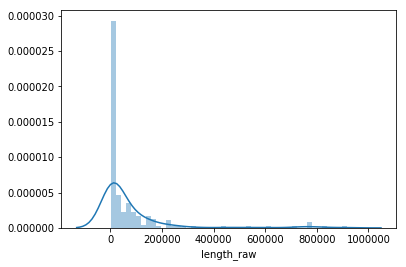

In [0]:
display(df_lyrics["length_raw"].describe())
#df_lyrics["length_raw"].quantile(q=.75)
#df_lyrics[df_lyrics["length_raw"]>df_lyrics["length_raw"].quantile(q=.75)]
sns.distplot(df_lyrics["length_raw"][df_lyrics["length_raw"]>df_lyrics["length_raw"].quantile(q=.75)])
plt.show()

In [0]:
df_lyrics["length_raw"][df_lyrics["length_raw"]>df_lyrics["length_raw"].quantile(q=.75)].describe()

count       471.000000
mean      72085.422505
std      152213.549381
min        2127.000000
25%        2628.500000
50%       10043.000000
75%       79310.000000
max      915665.000000
Name: length_raw, dtype: float64

In [0]:
variance = df_lyrics["length_raw"][df_lyrics["length_raw"] < 
                                   df_lyrics["length_raw"].quantile(q=.75)].std()
too_long = df_lyrics["length_raw"].quantile(q=.75) + variance*2
print(df_lyrics[df_lyrics["length_raw"]>too_long].shape)
display(df_lyrics[df_lyrics["length_raw"]>too_long].tail(5))
df_lyrics["length_raw"][df_lyrics["length_raw"]>too_long].describe()

(327, 6)


,target,artist_names,track_names,lyrics_raw,lyrics_clean,length_raw
813,1,mansionz,STFU,"[Verse 1: blackbear]\nOh, yeah\nI ain't hit yo...","[Verse 1: blackbear]\nOh, yeah\nI ain't hit yo...",2995
858,1,KYLE,Remember Me?,"[Verse 1: KYLE]\nYeah, okay well hey yo rememb...","[Verse 1: KYLE]\nYeah, okay well hey yo rememb...",2992
427,1,Eppic,Hide and Seek,[Chorus: Poppy]\nNow are we gonna continue\nPl...,[Chorus: Poppy]\nNow are we gonna continue\nPl...,2990
1791,0,Slaid Cleaves,Breakfast in Hell,In the melting snows of Ontario\nWhere the win...,In the melting snows of Ontario\nWhere the win...,2984
851,1,Justin Stone,Safe to Say,"[Verse 1]\nYeah, canvas made from that dream\n...","[Verse 1]\nYeah, canvas made from that dream\n...",2975


count       327.000000
mean     102759.960245
std      174114.993626
min        2975.000000
25%        7504.000000
50%       37987.000000
75%      113998.500000
max      915665.000000
Name: length_raw, dtype: float64

(1888, 6)
(1561, 6)


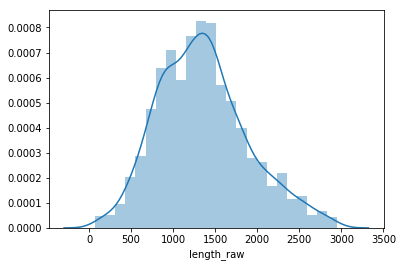

In [0]:
print(df_lyrics.shape)
df_lyrics = df_lyrics[df_lyrics["length_raw"]<too_long]
print(df_lyrics.shape)
sns.distplot(df_lyrics["length_raw"])
plt.show()

In [0]:
df_lyrics = df_lyrics.sort_index()
df_lyrics.head()

,target,artist_names,track_names,lyrics_raw,lyrics_clean,length_raw
0,1,Lorde,Sober,"[Intro]\nNight, midnight, lose my mind\nNight,...",intro night midnight lose mind night midnight ...,2485
1,1,Lorde,Homemade Dynamite,[Verse 1]\nA couple rebel top gun pilots\nFlyi...,verse couple rebel top gun pilot flying nowher...,1795
2,1,Lorde,The Louvre,"[Verse 1]\nWell, summer slipped us underneath ...",verse well summer slipped u underneath tongue ...,1824
3,1,Lorde,Liability,"[Intro]\nOne, two\n\n[Verse 1]\nBaby really hu...",intro one two verse baby really hurt cry taxi ...,1305
4,1,Lorde,Hard Feelings/Loveless,Hard Feelings\n\n(Go back and tell it)\n\nPlea...,hard feeling go back tell please could tender ...,2386


### RegEx

In [0]:
#
import re
def text_cleaner(text):
  doc = re.sub(r'--',' ', text)
  # remove special chars
  doc = re.sub(r'\W', ' ', doc)
  # remove all single characters
  doc = re.sub(r'\s+[a-zA-Z]\s+', ' ', doc)
  # remove single characters from the start
  doc = re.sub(r'\^[a-zA-Z]\s+', ' ', doc)
  # set to lowercase
  doc = doc.lower()
  # remove line breaks
  doc = re.sub(r"\n", " ", doc)
  # remove music terminology
  doc = re.sub(r"intro", "", doc)
  doc = re.sub(r"chorus", "", doc)
  doc = re.sub(r"verse", "", doc)
  doc = re.sub(r"outro", "", doc)
  doc = re.sub(r"hook", "", doc)
  # remove numbers
  doc = re.sub(r"[0-9]", "", doc)
  # substituting multiple spaces with single space
  doc = re.sub(r'\s+', ' ', doc, flags=re.I)
  return doc

In [0]:
df_lyrics["lyrics_clean"] = df_lyrics["lyrics_raw"]
df_lyrics["lyrics_clean"] = [text_cleaner(lyric) for lyric in df_lyrics["lyrics_clean"]]
#df_lyrics[df_lyrics["lyrics_clean"]=="nan"].shape

(0, 6)

In [0]:
type(df_lyrics["lyrics_clean"])
print(len(df_lyrics["lyrics_clean"][0]))
print(df_lyrics["lyrics_clean"][0][:200])

2275
 night midnight lose my mind night midnight lose my mind night midnight lose my mind when you get to my high when you get to my night midnight oh god m clean out of air in my lungs it all gone played 


In [0]:
df_lyrics["length_clean"] = [len(x) for x in df_lyrics["lyrics_clean"]]
display(df_lyrics.head())

,target,artist_names,track_names,lyrics_raw,lyrics_clean,length_raw,length_clean
0,1,Lorde,Sober,"[Intro]\nNight, midnight, lose my mind\nNight,...",night midnight lose my mind night midnight lo...,2485,2275
1,1,Lorde,Homemade Dynamite,[Verse 1]\nA couple rebel top gun pilots\nFlyi...,couple rebel top gun pilots flying with nowhe...,1795,1621
2,1,Lorde,The Louvre,"[Verse 1]\nWell, summer slipped us underneath ...",well summer slipped us underneath her tongue ...,1824,1665
3,1,Lorde,Liability,"[Intro]\nOne, two\n\n[Verse 1]\nBaby really hu...",one two baby really hurt me crying in the tax...,1305,1157
4,1,Lorde,Hard Feelings/Loveless,Hard Feelings\n\n(Go back and tell it)\n\nPlea...,hard feelings go back and tell it please could...,2386,2189


count    1561.000000
mean     1227.308136
std       484.863669
min        64.000000
25%       873.000000
50%      1196.000000
75%      1521.000000
max      2757.000000
Name: length_clean, dtype: float64

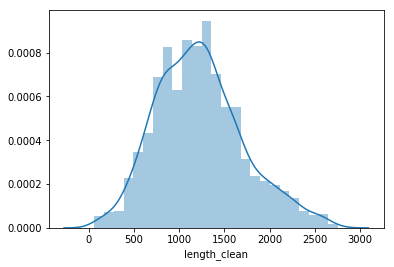

In [0]:
display(df_lyrics["length_clean"].describe())
sns.distplot(df_lyrics["length_clean"])
plt.show()

### save locally

In [0]:
#from google.colab import files
filename = "lyric_test_data_clean"
df_lyrics.to_csv(filename+".csv")
#files.download(filename+".csv")

## Parse Text

In [0]:
%%time

import spacy

# create list to hold spaCy docs
text_parsed = []
text_nostops = []

# parse cleaned text
# instantiate nlp
#nlp = spacy.load('en', disable=['parser', 'ner'])
nlp = spacy.load('en')
spacy_text = nlp.pipe(df_lyrics['lyrics_clean'], batch_size=10, n_threads=3)

# use spaCy generator to append docs to doc list
for text in spacy_text:
  #text = [token.lemma_ for token in nlp(str(text))]
  text_parsed.append([token.lemma_ for token in nlp(str(text))])
  #text = [token.lemma_ for token in nlp(str(text)) if not token.is_stop]
  text_nostops.append([token.lemma_ for token in nlp(str(text)) if not token.is_stop])

# add spaCy docs to lyrics DF
df_lyrics['lyrics_parsed'] = text_parsed
df_lyrics['length_parsed'] = [len(x) for x in df_lyrics['lyrics_parsed']]
df_lyrics['lyrics_nostops'] = text_nostops
df_lyrics['length_nostops'] = [len(x) for x in df_lyrics['lyrics_nostops']]
display(df_lyrics.head())

,id,lyrics_raw,length_raw,lyrics_clean,length_clean,lyrics_parsed,length_parsed,lyrics_nostops,length_nostops
0,7eElVgPcxDqmgGrSwVFI74,"[Intro]\nNight, midnight, lose my mind\nNight,...",2485.0,night midnight lose my mind night midnight lo...,2275.0,"[ , night, midnight, lose, -PRON-, mind, night...",494,"[ , night, midnight, lose, mind, night, midnig...",187
1,02oAUzv4M0ItuTDy2RT3IT,[Verse 1]\nA couple rebel top gun pilots\nFlyi...,1795.0,couple rebel top gun pilots flying with nowhe...,1621.0,"[ , couple, rebel, top, gun, pilot, fly, with,...",309,"[ , couple, rebel, gun, pilot, fly, don, know,...",169
2,5q4BpnMrYEFzLO0dYODj6J,"[Verse 1]\nWell, summer slipped us underneath ...",1824.0,well summer slipped us underneath her tongue ...,1665.0,"[ , well, summer, slip, -PRON-, underneath, -P...",334,"[ , summer, slip, underneath, tongue, day, nig...",151
3,6Kkt27YmFyIFrcX3QXFi2o,"[Intro]\nOne, two\n\n[Verse 1]\nBaby really hu...",1305.0,one two baby really hurt me crying in the tax...,1157.0,"[ , one, two, baby, really, hurt, -PRON-, cry,...",242,"[ , baby, hurt, cry, taxi, don, wanna, know, s...",101
4,1Dp7JGFNjvg8Nk0CtMCcnr,Hard Feelings\n\n(Go back and tell it)\n\nPlea...,2386.0,hard feelings go back and tell it please could...,2189.0,"[hard, feeling, go, back, and, tell, -PRON-, p...",458,"[hard, feeling, tell, tender, sit, close, let,...",244


CPU times: user 3min 41s, sys: 1.75 s, total: 3min 42s
Wall time: 3min 42s


In [0]:
type(df_lyrics["lyrics_parsed"])
print(len(df_lyrics["lyrics_parsed"][0]))
print(df_lyrics["lyrics_parsed"][0][:200])

494
[' ', 'night', 'midnight', 'lose', '-PRON-', 'mind', 'night', 'midnight', 'lose', '-PRON-', 'mind', 'night', 'midnight', 'lose', '-PRON-', 'mind', 'when', '-PRON-', 'get', 'to', '-PRON-', 'high', 'when', '-PRON-', 'get', 'to', '-PRON-', 'night', 'midnight', 'oh', 'god', 'm', 'clean', 'out', 'of', 'air', 'in', '-PRON-', 'lung', '-PRON-', 'all', 'go', 'play', '-PRON-', 'so', 'nonchalant', '-PRON-', 'time', '-PRON-', 'dance', 'with', 'the', 'truth', 'move', 'alone', 'with', 'the', 'truth', 'ooh', 'hey', '-PRON-', 're', 'sleep', 'through', 'all', 'the', 'day', 'm', 'act', 'like', 'don', 'see', 'every', 'ribbon', '-PRON-', 'use', 'to', 'tie', '-PRON-', 'to', '-PRON-', 'pre', 'but', '-PRON-', 'hip', 'have', 'miss', '-PRON-', 'hip', 'so', 'let', 'get', 'to', 'know', 'the', 'kick', 'will', '-PRON-', 'sway', 'with', '-PRON-', 'go', 'astray', 'with', '-PRON-', 'ah', 'ha', '-PRON-', 're', 'king', 'and', 'queen', 'of', 'the', 'weekend', 'ain', 'a', 'pill', 'that', 'could', 'touch', '-PRON-', '

count    3502.000000
mean      114.083381
std       143.294921
min         1.000000
25%         1.000000
50%         1.000000
75%       233.000000
max       564.000000
Name: length_parsed, dtype: float64

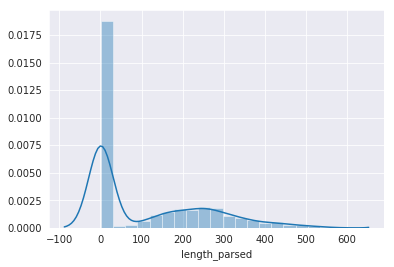

In [0]:
display(df_lyrics['length_parsed'].describe())
sns.distplot(df_lyrics["length_parsed"])
plt.show()

### save locally

In [0]:
from google.colab import files
filename = "lyric_test_data_parsed"
df_lyrics.to_csv(filename+".csv")
files.download(filename+".csv")

## Feature Extraction

### Bag of Words

In [0]:
all_words = []
for text in df_lyrics['lyrics_nostops']:
  for word in text:
    all_words.append(word)
    
all_words.remove("-PRON-")
all_words.remove(" ")
all_words.remove("nan")
print(len(all_words))
print(all_words[:10])

from collections import Counter
common_words = [word[0] for word in Counter(all_words).most_common(200)]
print(len(common_words))
print(type(common_words))
print(type(common_words[0]))
print(common_words[:10])

185588
['night', 'midnight', 'lose', 'mind', 'night', 'midnight', 'lose', 'mind', 'night', 'midnight']
200
<class 'list'>
<class 'str'>
['m', 'oh', 'know', 'don', 'love', 'like', 'will', 'get', 'go', 'nan']


In [0]:
word_counts = pd.concat([df_lyrics['id'], pd.DataFrame(columns=common_words)], axis=1)
word_counts.loc[:, common_words] = 0

display(word_counts.columns)
word_counts.head()

Index(['id', 'm', 'oh', 'know', 'don', 'love', 'like', 'will', 'get', 'go',
       ...
       'pain', 'sound', 'keep', 'help', 'chase', 'city', 'fine', 'morning',
       'sing', 'drop'],
      dtype='object', length=201)

,id,m,oh,know,don,love,like,will,get,go,nan,come,let,time,ve,feel,want,to,cause,wanna,yeah,heart,think,tell,,way,need,away,win,pre,right,fall,night,baby,leave,run,ain,hold,good,look,...,tear,ground,road,-PRON-,catch,gold,black,call,town,people,ghost,post,matter,big,well,better,touch,body,shine,ask,slow,round,sweet,kid,white,easy,feeling,blow,waste,money,pain,sound,keep,help,chase,city,fine,morning,sing,drop
0,7eElVgPcxDqmgGrSwVFI74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,02oAUzv4M0ItuTDy2RT3IT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5q4BpnMrYEFzLO0dYODj6J,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6Kkt27YmFyIFrcX3QXFi2o,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1Dp7JGFNjvg8Nk0CtMCcnr,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
%%time
# Create our data frame with features. This can take a while to run.

# Process each row, counting the occurrence of words in each sentence.
for i, text in enumerate(df_lyrics['lyrics_nostops']):

  words = [word for word in text if word in common_words]

  # Populate the row with word counts.
  for word in words:
    word_counts.loc[i, word] += 1

  # This counter is just to make sure the kernel didn't hang.
  if i % 50 == 0:
    print("Processing row {}".format(i))

Processing row 0
Processing row 50
Processing row 100
Processing row 150
Processing row 200
Processing row 250
Processing row 300
Processing row 350
Processing row 400
Processing row 450
Processing row 500
Processing row 550
Processing row 600
Processing row 650
Processing row 700
Processing row 750
Processing row 800
Processing row 850
Processing row 900
Processing row 950
Processing row 1000
Processing row 1050
Processing row 1100
Processing row 1150
Processing row 1200
Processing row 1250
Processing row 1300
Processing row 1350
Processing row 1400
Processing row 1450
Processing row 1500
Processing row 1550
Processing row 1600
Processing row 1650
Processing row 1700
Processing row 1750
Processing row 1800
Processing row 1850
Processing row 1900
Processing row 1950
Processing row 2000
Processing row 2050
Processing row 2100
Processing row 2150
Processing row 2200
Processing row 2250
Processing row 2300
Processing row 2350
Processing row 2400
Processing row 2450
Processing row 2500
Pro

In [0]:
word_counts.head()

,id,m,oh,know,don,love,like,will,get,go,nan,come,let,time,ve,feel,want,to,cause,wanna,yeah,heart,think,tell,,way,need,away,win,pre,right,fall,night,baby,leave,run,ain,hold,good,look,...,tear,ground,road,-PRON-,catch,gold,black,call,town,people,ghost,post,matter,big,well,better,touch,body,shine,ask,slow,round,sweet,kid,white,easy,feeling,blow,waste,money,pain,sound,keep,help,chase,city,fine,morning,sing,drop
0,7eElVgPcxDqmgGrSwVFI74,3,4,6,3,0,1,3,0,1,0,0,2,1,0,3,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0,0,4,0,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
1,02oAUzv4M0ItuTDy2RT3IT,0,0,4,1,2,0,4,0,1,0,3,6,0,0,0,0,1,0,0,1,0,3,3,1,0,0,0,0,2,3,0,0,0,0,0,0,0,6,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0
2,5q4BpnMrYEFzLO0dYODj6J,1,0,1,0,1,0,2,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,10,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,6Kkt27YmFyIFrcX3QXFi2o,4,0,2,2,2,0,1,0,3,0,0,0,0,0,0,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,2,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1Dp7JGFNjvg8Nk0CtMCcnr,4,0,1,1,6,2,2,0,4,0,1,3,1,1,1,0,4,3,6,2,2,0,3,0,1,1,2,0,0,3,0,0,0,3,0,0,0,0,4,...,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,7,0,0,0,0,0,0,0,0,1,0,0,0,0


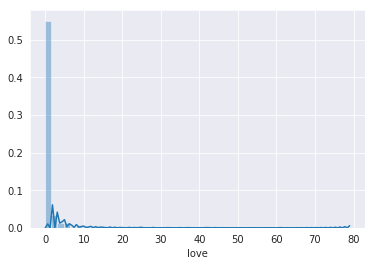

In [0]:
word1 = "love"
word_counts[word1].astype(int).describe()
sns.distplot(word_counts[word1].astype(int))
plt.show();

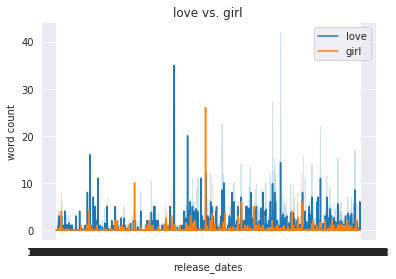

In [0]:
word1 = "love"
word2 = "girl"

sns.lineplot(x=df_af['release_dates'], y=word_counts[word1].astype(int), label=word1)
sns.lineplot(x=df_af['release_dates'], y=word_counts[word2].astype(int), label=word2)
plt.ylabel('word count')
plt.legend()
plt.title('{} vs. {}'.format(word1, word2))
plt.show();

#### Save data locally

In [0]:
#from google.colab import files
filename = 'lyric_word_counts'
word_counts.to_csv(filename+".csv", index=True)
files.download(filename+".csv")